In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

In [2]:
df = pd.read_csv("../rastro_1min.tar.gz", parse_dates=[0], index_col=0)
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,514,102539,19.737289,17.590780,27203112,3707.610350,4828.865308,3542,163,73861,3.443046,4.184972,8863072.0,434.507309,616.176033,10628.0,9784.0
2016-06-29 22:57:00,634,58511,16.470517,15.334160,7034656,2017.145780,2984.791050,3120,73,84479,3.385373,3.600891,8968600.0,373.483436,468.323626,14496.0,11233.0
2016-06-29 22:58:00,889,121123,16.866703,14.328054,22695704,2655.061443,3775.325510,5054,159,173947,6.576329,5.829330,14363056.0,544.011478,561.241565,19482.0,6716.0
2016-06-29 22:59:00,670,105240,18.245522,15.004146,19683368,2672.386192,3300.962021,3996,177,122518,6.762097,5.491740,9711008.0,540.194010,469.583361,14376.0,3372.0
2016-06-29 23:00:00,629,651738,27.337623,13.555662,169093944,5919.297844,4132.723859,14467,1120,124437,6.628143,6.706426,11546504.0,596.334224,698.955721,13902.0,4634.0


In [13]:
market = pd.date_range(start="2016/07/03 09:00:00", end="2016/08/01 00:00:00", freq="1w").tolist() + \
    pd.date_range(start="2016/07/03 16:00:00", end="2016/08/01 00:00:00", freq="1w").tolist()

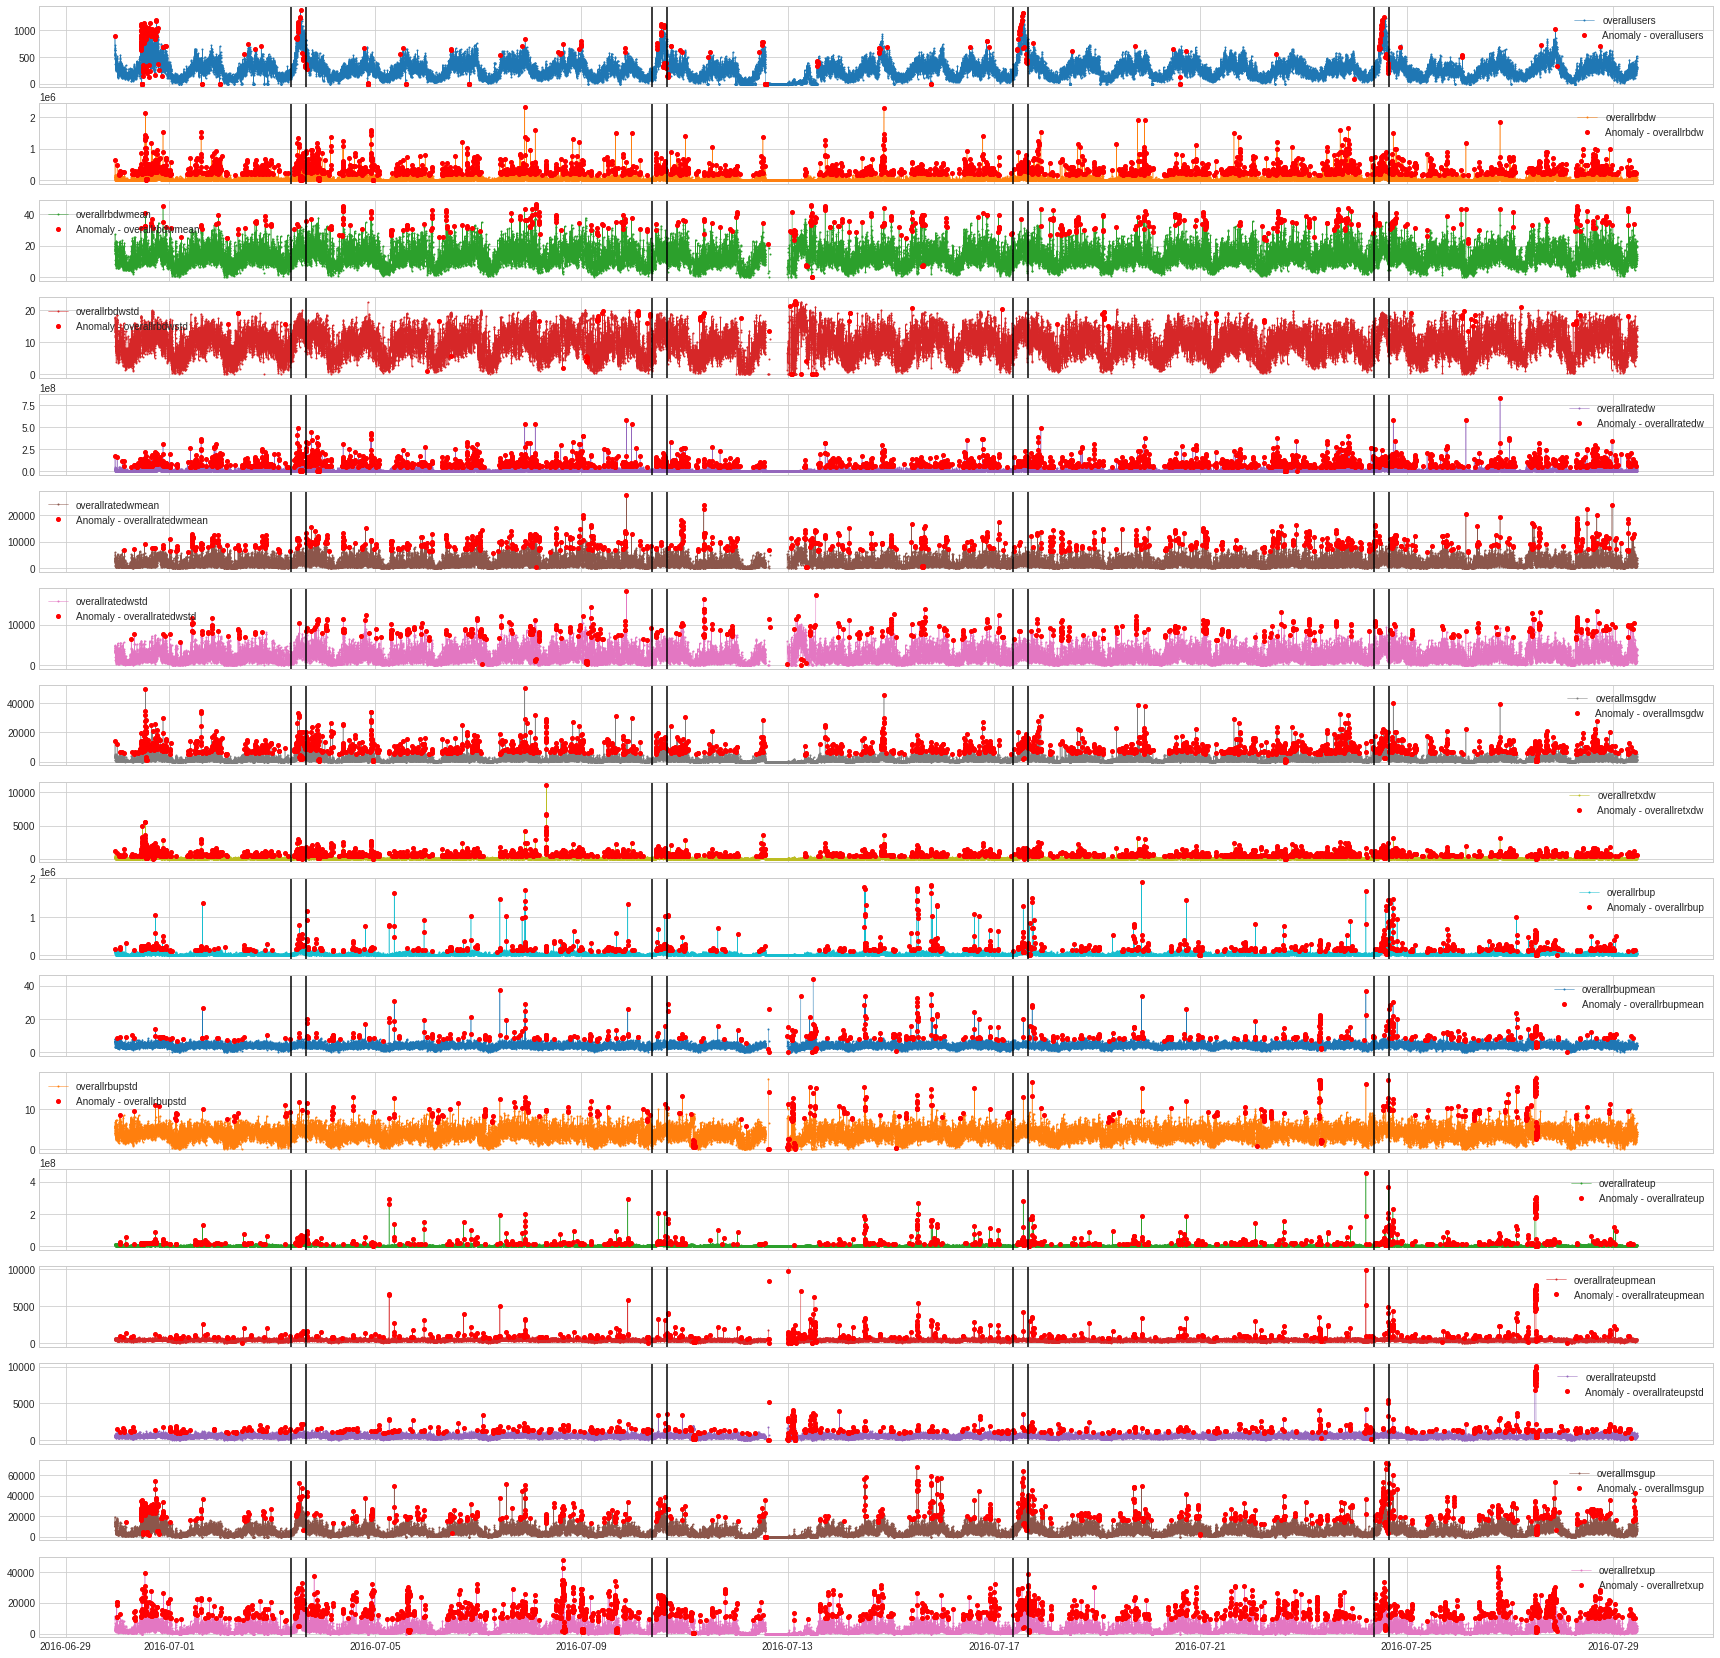

In [16]:
detector = PersistAD(window="1H")
anomalies = detector.fit_detect(df)
axs = plot(df, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", figsize=(30,30))

for t in market:
    for ax in axs:
        ax.axvline(t, color="black", ls="-")

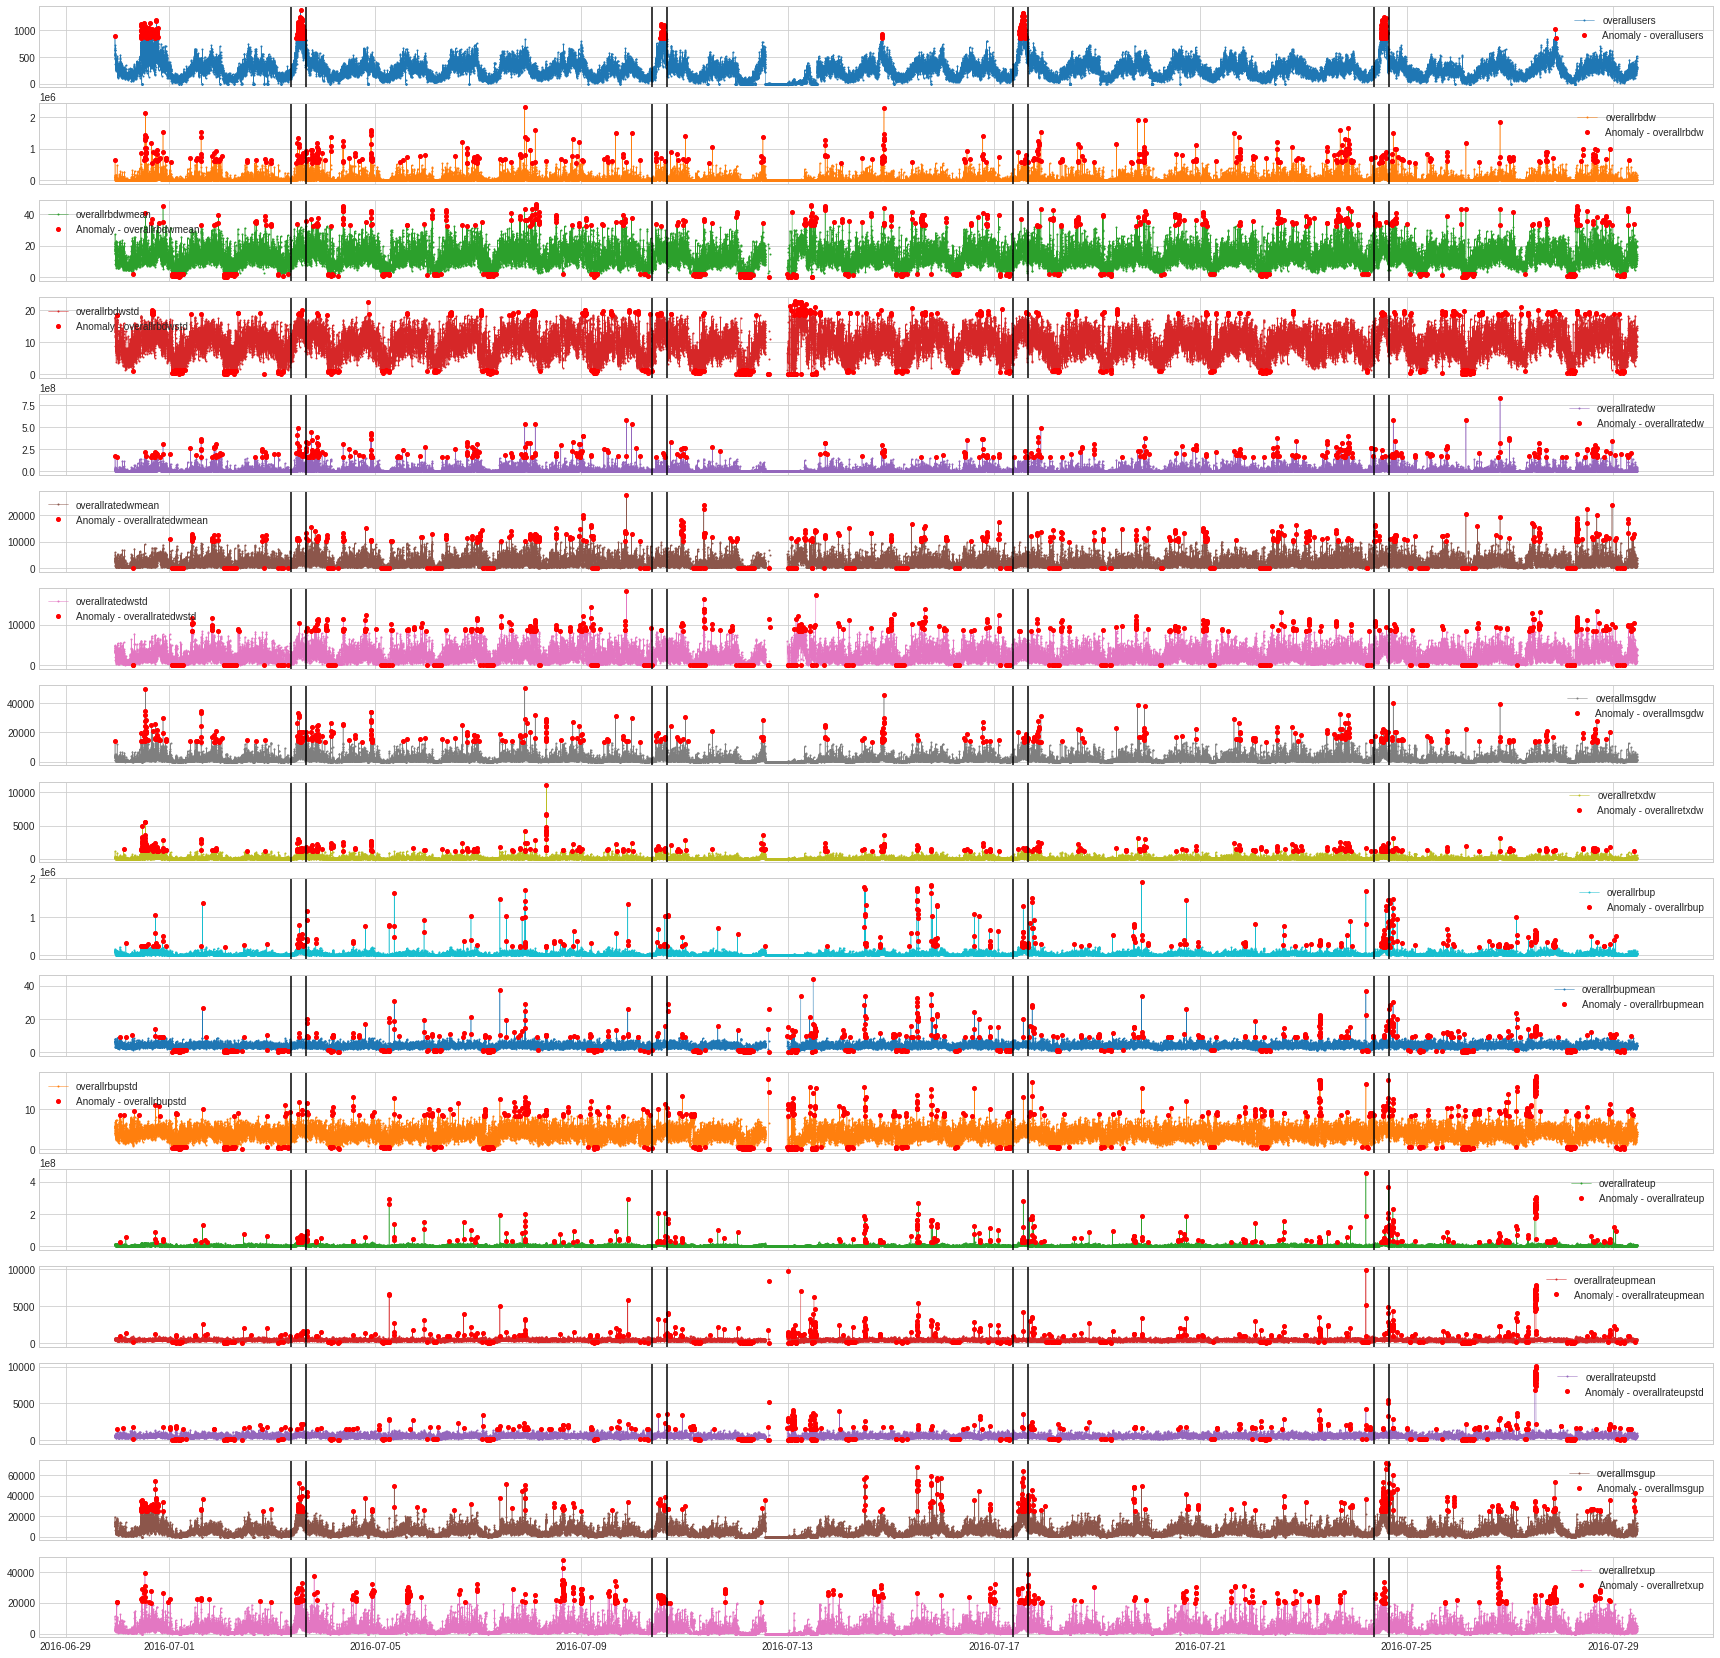

In [18]:
detector = QuantileAD(low=.01, high=.99)
anomalies = detector.fit_detect(df)
axs = plot(df, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", figsize=(30,30))

for t in market:
    for ax in axs:
        ax.axvline(t, color="black", ls="-")

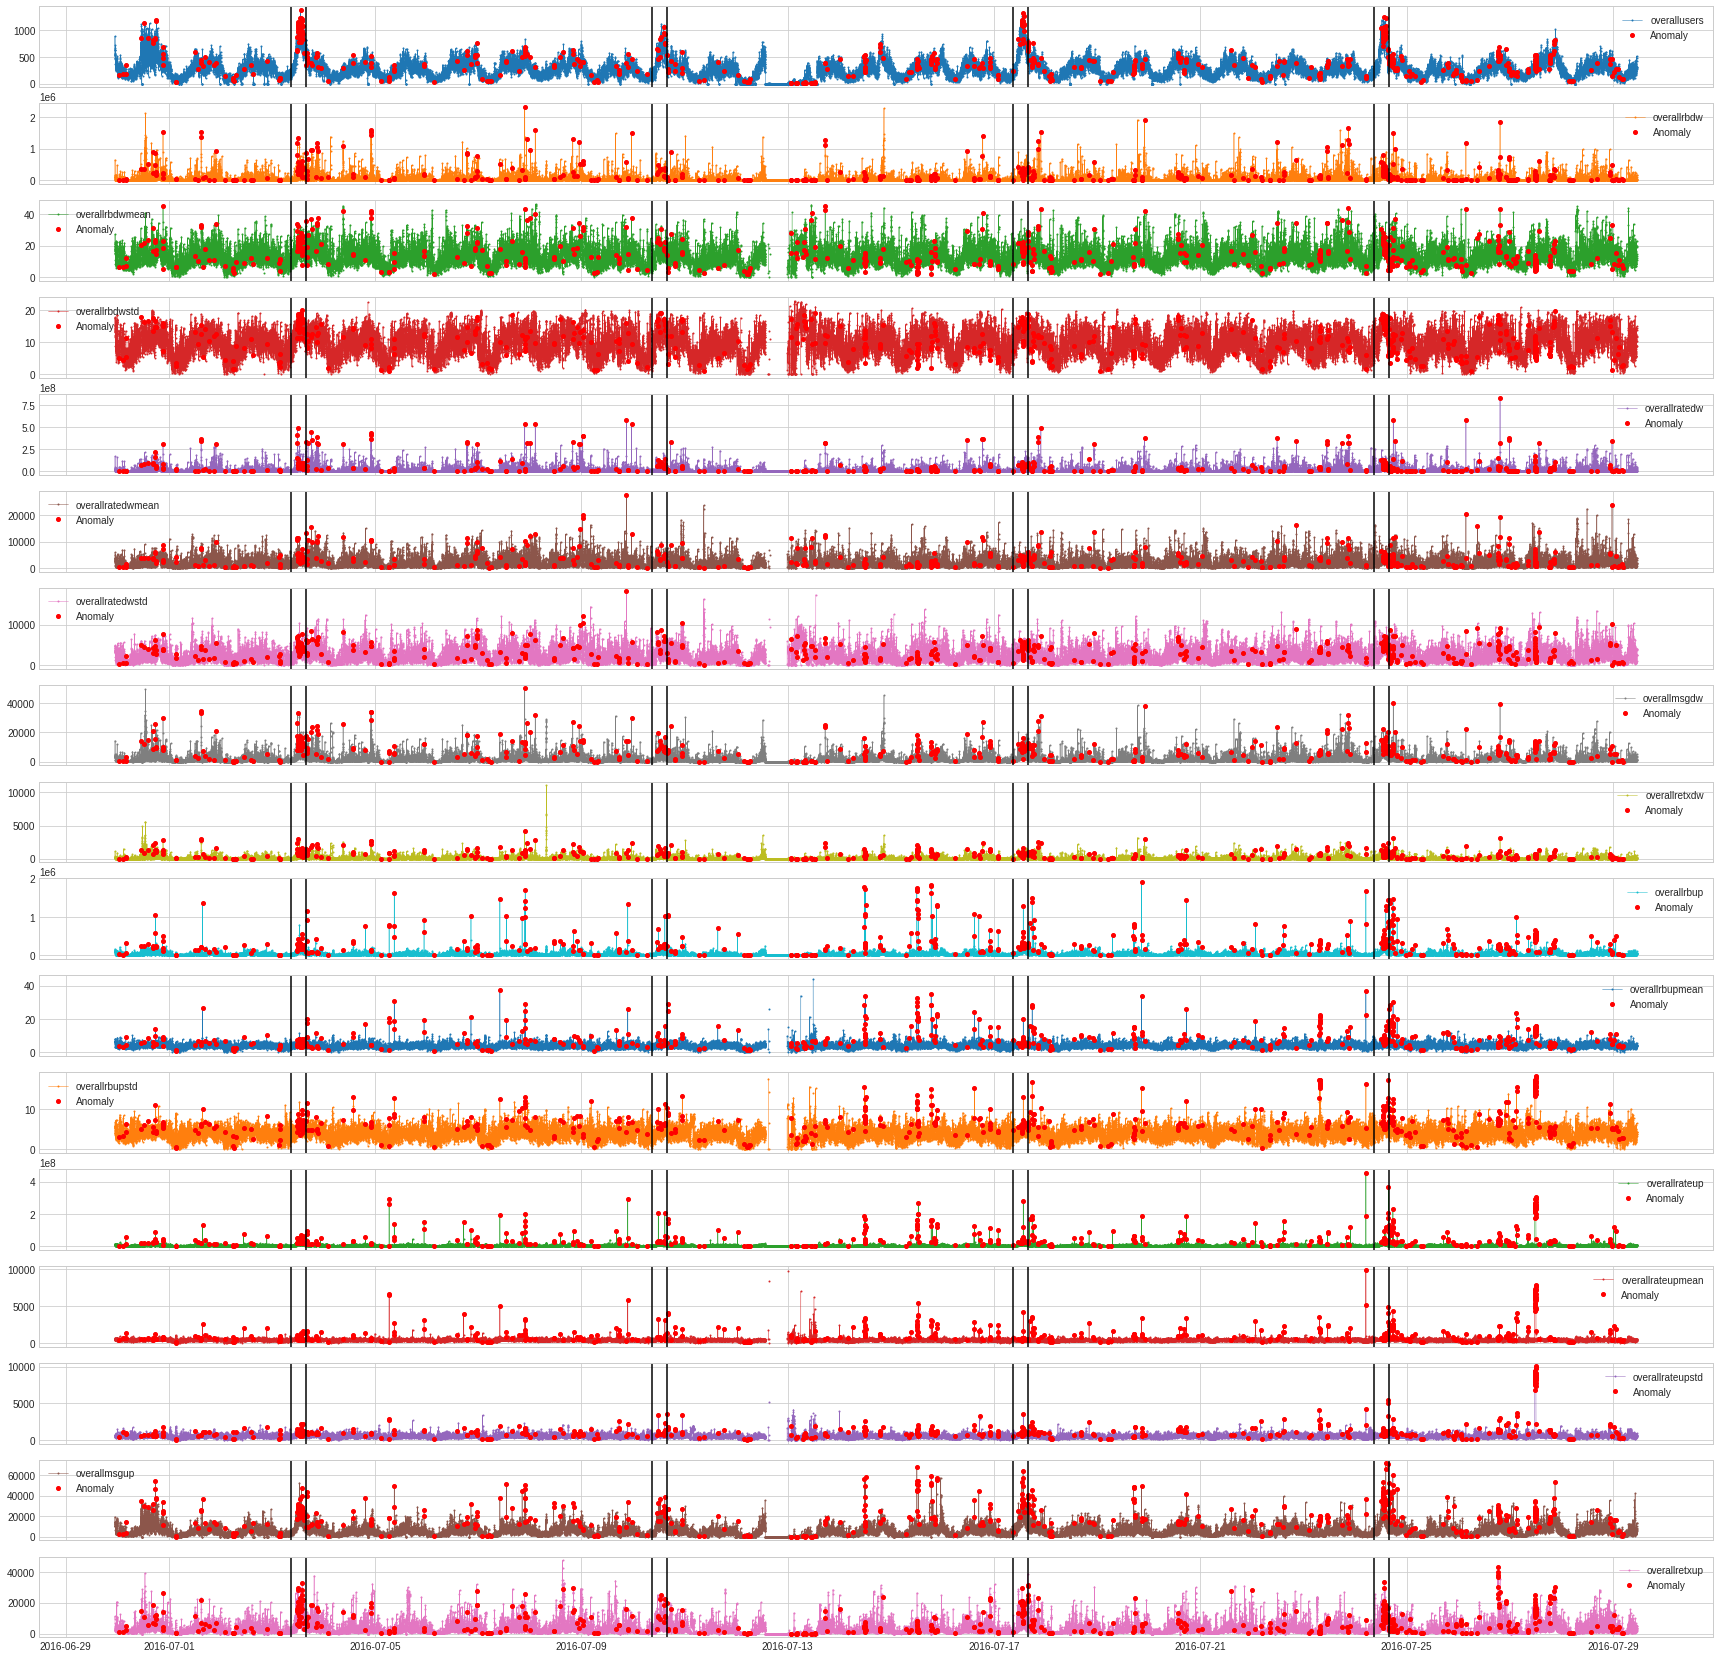

In [40]:
detector = OutlierDetector(LocalOutlierFactor(n_neighbors=150, n_jobs=-1))
anomalies = detector.fit_detect(df)
axs = plot(df, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", figsize=(30,30))

for t in market:
    for ax in axs:
        ax.axvline(t, color="black", ls="-")